In [1]:
import matplotlib.pylab as plt
import numpy as np
from astropy import units as u
from astropy.io import fits
import aplpy
import matplotlib.patheffects as pe
from astropy.wcs import WCS

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def figure_layout( fig, c_unit, fontcolor='white', colorbar=True):
    fig.set_nan_color('0.95')
    
    # beam 
    fig.add_beam()
    fig.beam.set(facecolor='white', edgecolor='black', hatch='////////')
    
    # 
    fig.axis_labels.set_font(size=15)
    fig.axis_labels.set_xtext('Right Ascension (ICRS)')
    fig.axis_labels.set_ytext('Declination (ICRS)')
    #fig.axis_labels.set_ypad(pad=-1.5)
    fig.tick_labels.set_yformat('d.ddd')
    fig.tick_labels.set_xformat('d.ddd')

    # Scale bar
    ang_sep = (12*u.arcsec).to(u.rad)
    fig.add_scalebar(ang_sep)
    fig.scalebar.set_label("$12''$")
    fig.scalebar.set_font(size=22)
    fig.scalebar.set_linewidth(3) 
    fig.scalebar.set_color(fontcolor)
    
    if colorbar:
        fig.add_colorbar()
        fig.colorbar.set_location('right')
        fig.colorbar.set_width(0.1)
        fig.colorbar.set_pad(0.05)
        fig.colorbar.set_axis_label_text(c_unit)
        fig.colorbar.set_label_properties(size=10)
    
    # Ticks
    fig.ticks.set_color(fontcolor)
    fig.ticks.set_tick_direction('in')
    #fig.ticks.set_minor_frequency(4)
    #fig.ticks.set_yspacing(0.006)  # degrees
    

### First create moment maps without any sigma clipping that we'll use for the analysis

In [3]:
!bettermoments /Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/not_clipped/DraChi.briggs0.C18O.velcor.lsrk.im.image.fits -method zeroth 

Loading up data...
Estimating noise in the data...
Estimated RMS: 1.16e-01.
Masking the data...
Calculating maps...
Checking for NaNs in error maps.
Saving moment maps...


INFO: Auto-setting vmin to -2.381e+03 [aplpy.core]


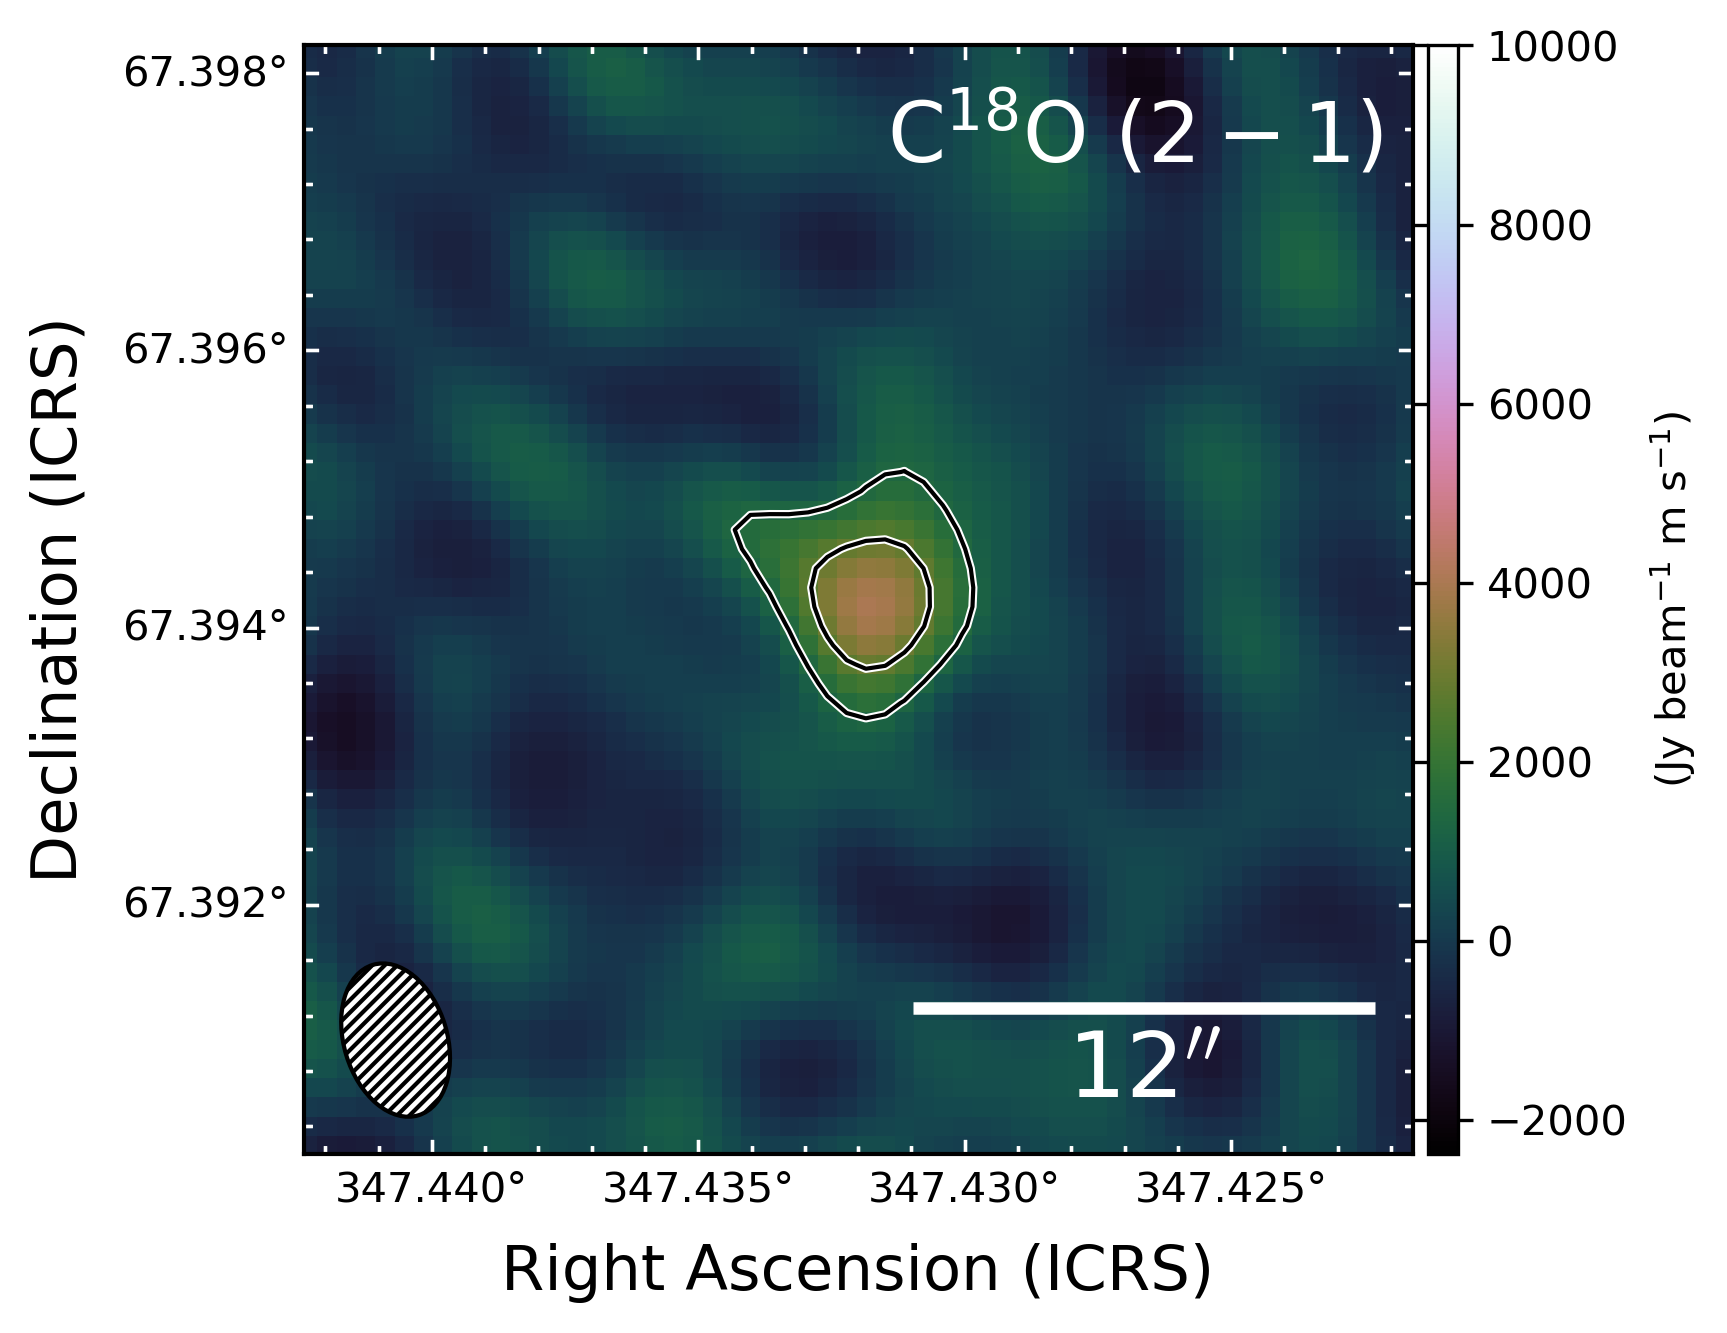

In [4]:
color_table='cubehelix'
fig = plt.figure(dpi=300)

mom0_C18O = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/not_clipped/DraChi.briggs0.C18O.velcor.lsrk.im.image_M0.fits')

f_mom0_C18O = aplpy.FITSFigure(mom0_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_C18O[0].data, [2, 98])
f_mom0_C18O.show_colorscale(cmap=color_table, vmax=10000) 

rms_notclipped = 4.63e2 # Jy/beam m/s; value taken from CASAviewer

# adopt the default layout
figure_layout( f_mom0_C18O, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)')

c_levs = np.array([3, 6, 12, 24])*rms_notclipped
f_mom0_C18O.show_contour(colors='white', linewidths=2., levels=c_levs)
f_mom0_C18O.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='white', size=20)


fig.savefig('../plots/moment0/mom0_C18O_unclipped.pdf', bbox_inches='tight')

### Second: Create Moment0 (=integrated intensity) map of C18O data, but now we're trying to reduce the noise in the data to get a nicer image

In [5]:
!bettermoments /Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.lsrk.im.image.fits -method zeroth -clip 2 -firstchannel 11 -lastchannel 32 --returnmask

# -clip 2: mask all pixel with < 2sigma_rms
# -firstchannel yy: start from channel yy
# -lastchannel xx: stop at channel xx


Loading up data...
Defining channel-based mask...
Estimating noise in the data...
Estimated RMS: 1.16e-01.
Calculating threshold-based mask...
Masking the data...
Calculating maps...
Checking for NaNs in error maps.
Saving moment maps...


In [6]:
mom0_C18O = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.lsrk.im.image_M0.fits')
mom0_C18O[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  144                                                  
NAXIS2  =                  144                                                  
BMAJ    = 0.001133798095915052                                                  
BMIN    = 0.000744579169485304                                                  
BPA     =            16.910122                                                  
BUNIT   = 'Jy/beam m/s'                                                         
CTYPE1  = 'RA---SIN'                                                            
CRVAL1  =       347.4318541667                                                  
CDELT1  =  -0.0001388888888889                                                  
CRPIX1  =                 73

In [7]:
rms = 1.0738E+02 # Jy/beam m/s; value taken from CASAviewer
max_em = 3.7129E+03 # Jy/beam m/s; value taken from CASAviewer

INFO: Auto-setting vmin to -1.437e+03 [aplpy.core]


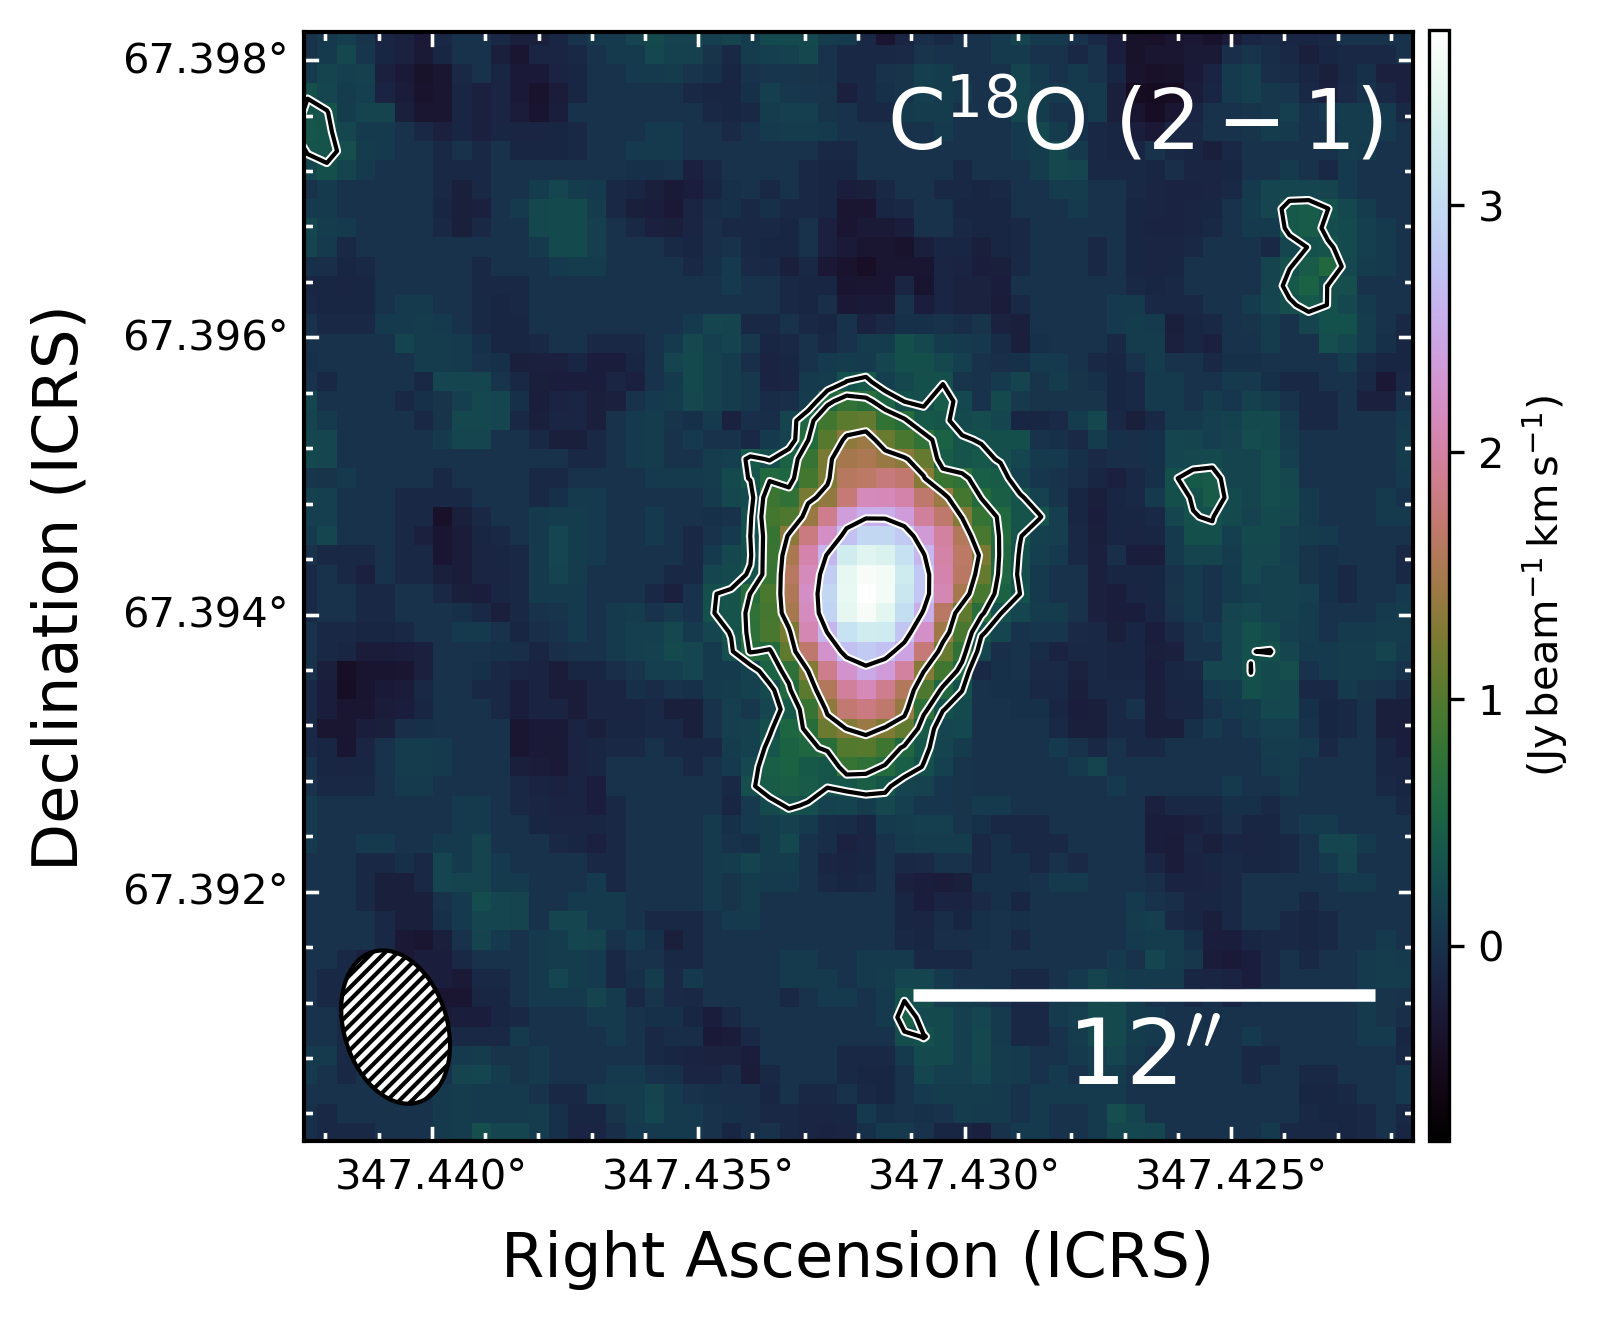

In [8]:
color_table='cubehelix'
fig = plt.figure(dpi=300)

f_mom0_C18O = aplpy.FITSFigure(mom0_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_C18O[0].data, [2, 98])
f_mom0_C18O.show_colorscale(cmap=color_table, vmax=10000) 

# adopt the default layout
figure_layout( f_mom0_C18O, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False)

c_levs = np.array([3, 6, 12, 24])*rms
f_mom0_C18O.show_contour(colors='white', linewidths=2., levels=c_levs)
f_mom0_C18O.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(mom0_C18O[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/moment0/mom0_C18O_3_6_12_24sigma_contours.pdf', bbox_inches='tight')


INFO: Auto-setting vmin to -1.422e+03 [aplpy.core]


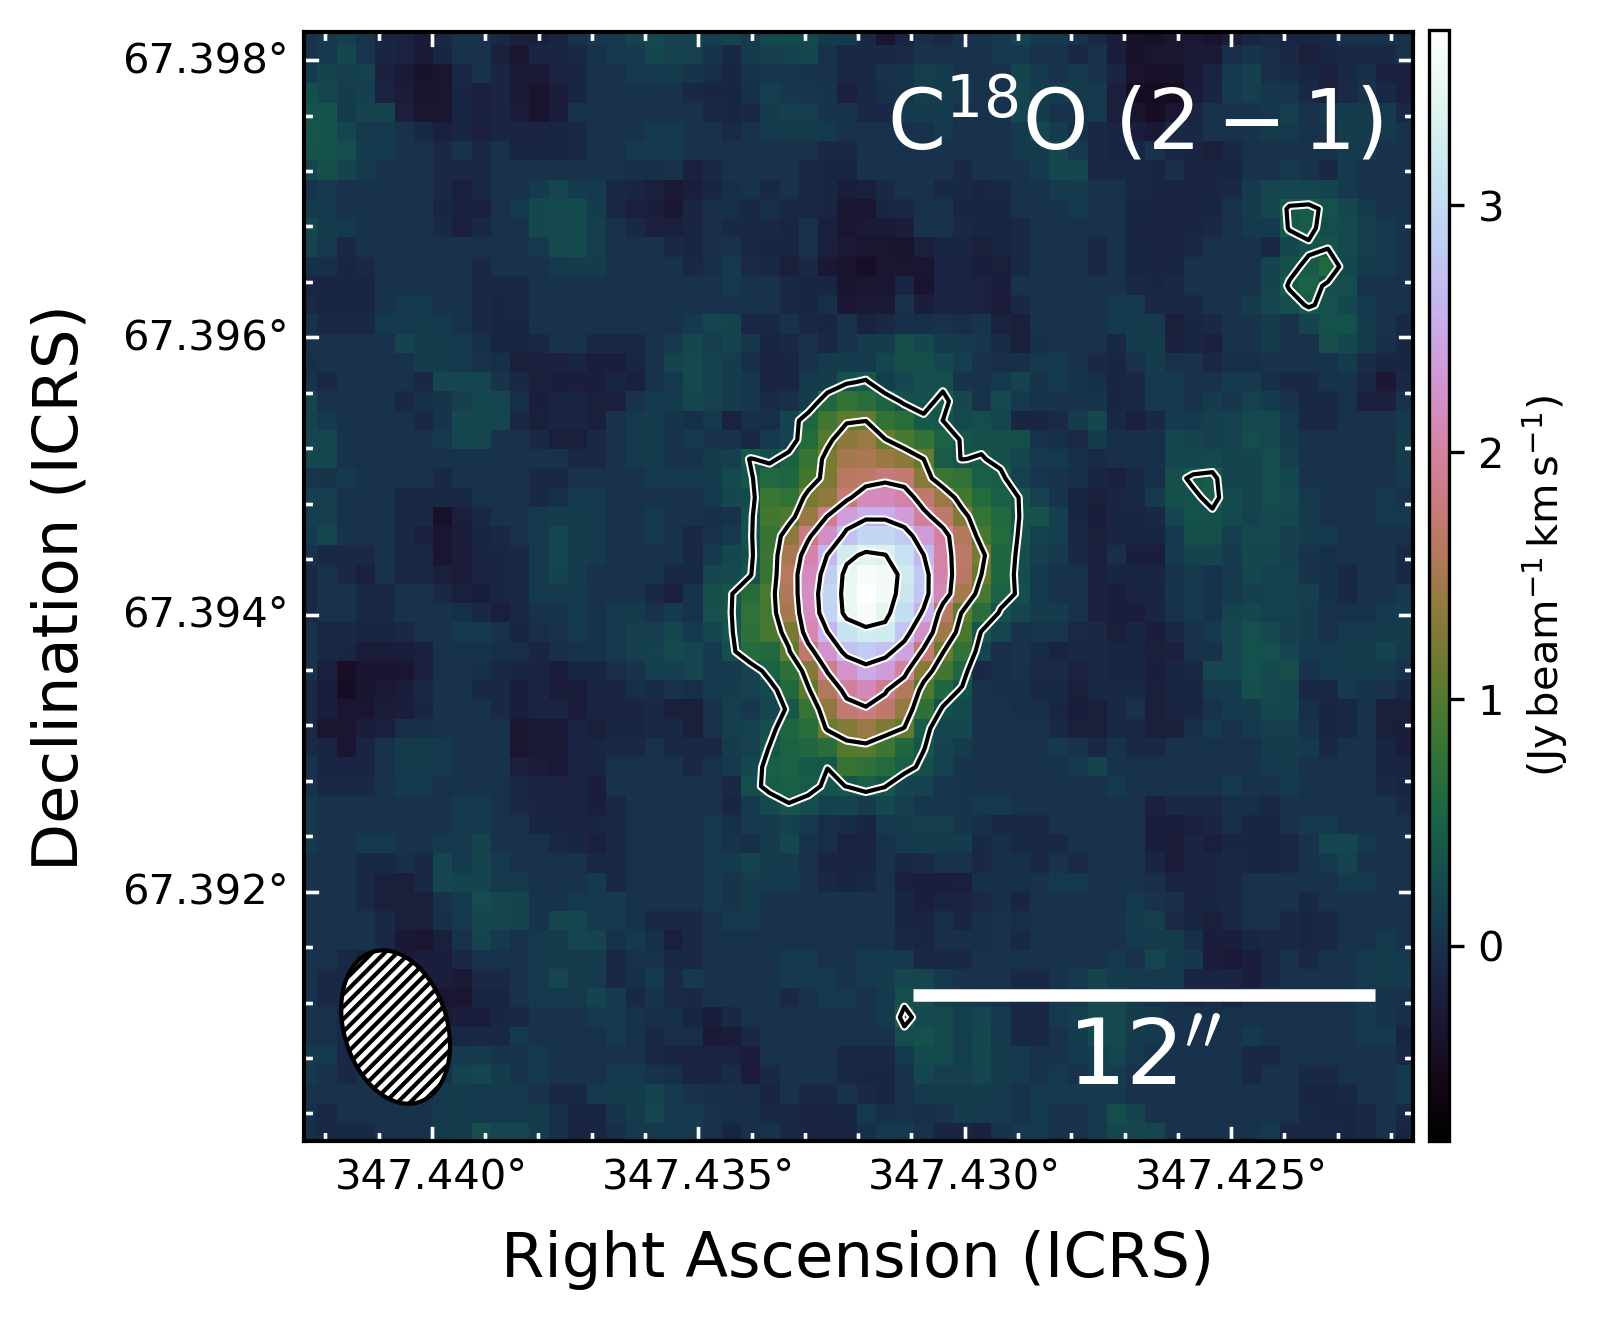

In [9]:
color_table='cubehelix'
fig = plt.figure(dpi=300)

f_mom0_C18O = aplpy.FITSFigure(mom0_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_C18O[0].data, [2, 98])
f_mom0_C18O.show_colorscale(cmap=color_table, vmax=10000) 

c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_mom0_C18O, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False)

f_mom0_C18O.show_contour(colors='white', linewidths=2., levels=c_levs)
f_mom0_C18O.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(mom0_C18O[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/moment0/mom0_C18O_10_30_etc_maxem_contours.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to -1.439e+03 [aplpy.core]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


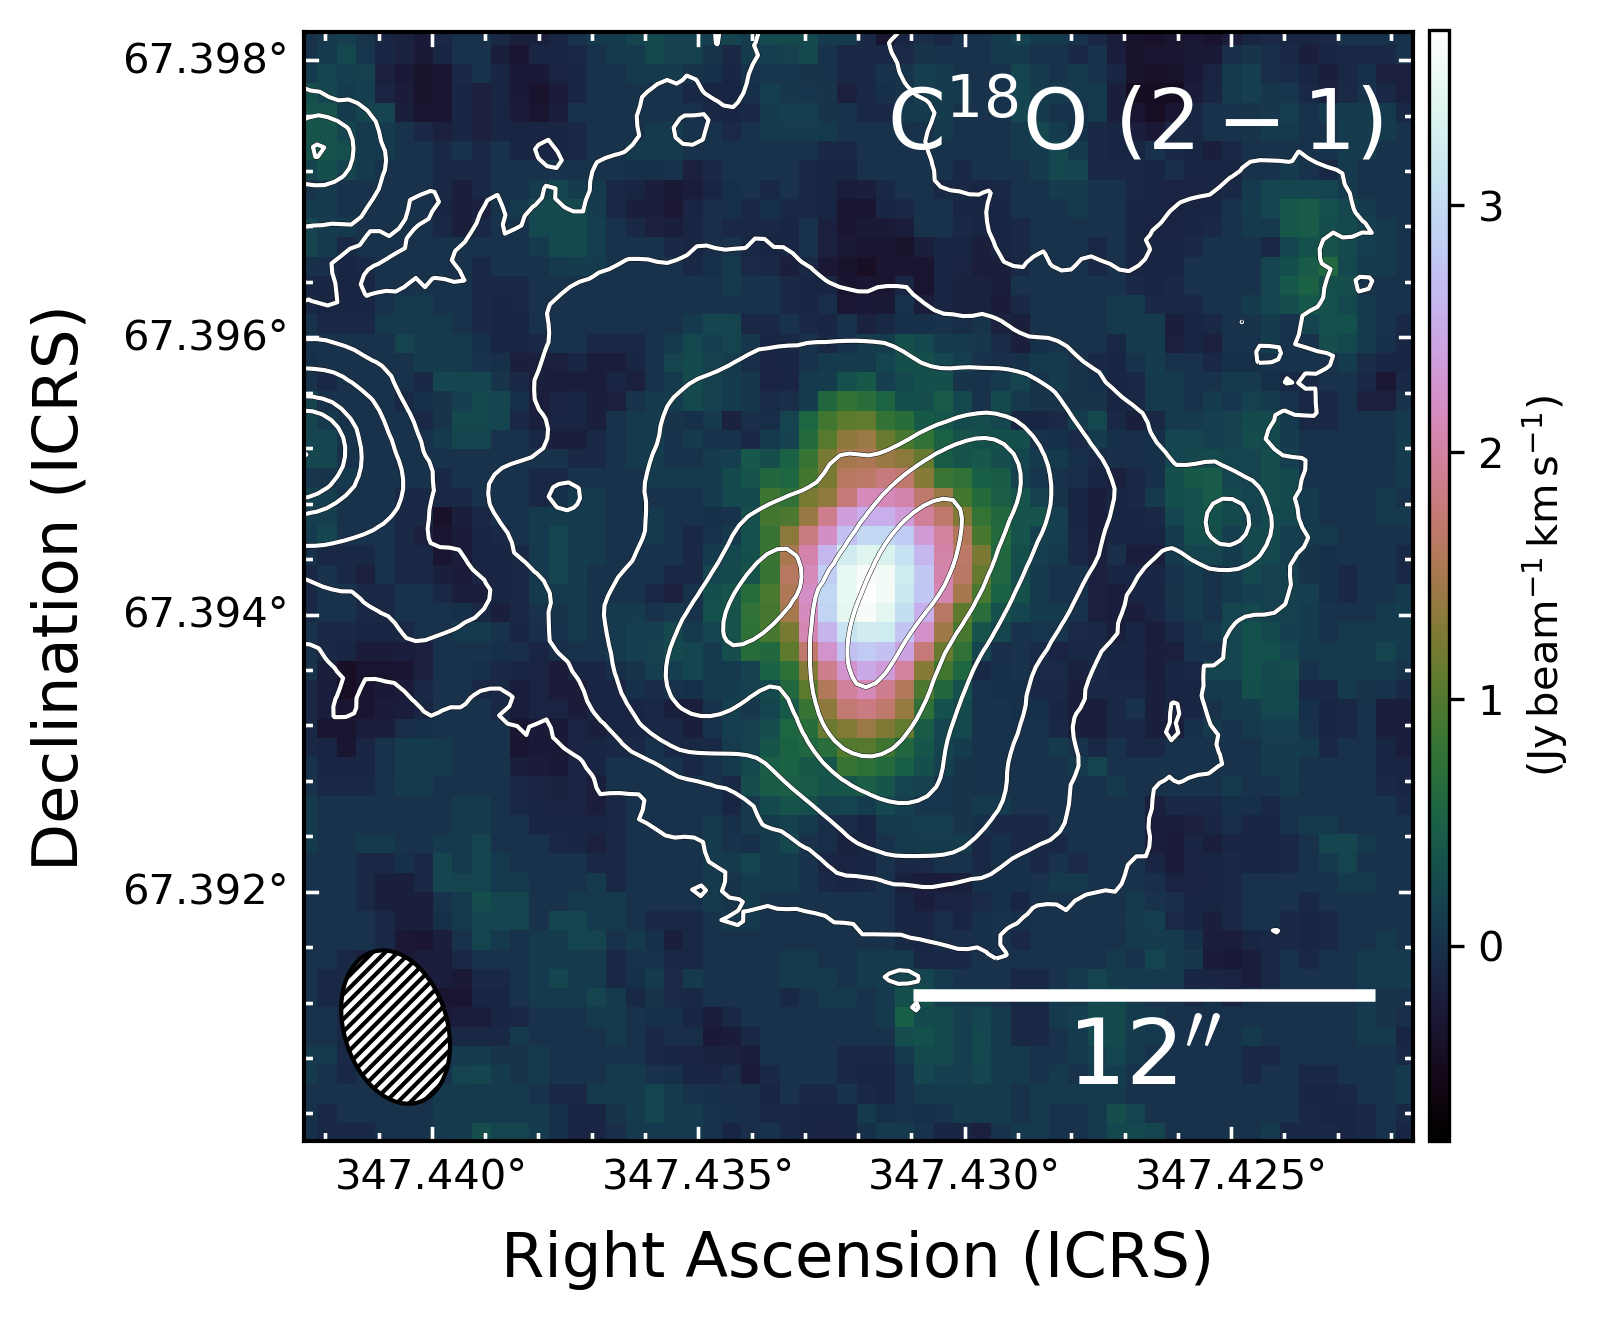

In [10]:
color_table='cubehelix'
fig = plt.figure(dpi=300)

f_mom0_C18O = aplpy.FITSFigure(mom0_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_C18O[0].data, [2, 98])
f_mom0_C18O.show_colorscale(cmap=color_table, vmax=10000) 

c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_mom0_C18O, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False)

rms_PS1 = 17.
c_levs = np.array([4, 16, 40, 160, 400, 1600])*rms_PS1
f_mom0_C18O.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='black', linewidths=1.2, levels=c_levs, smooth=3, kernel='box')
f_mom0_C18O.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='white', linewidths=1., levels=c_levs, smooth=3, kernel='box')

#f_mom0_C18O.show_contour(colors='white', linewidths=2., levels=c_levs)
#f_mom0_C18O.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(mom0_C18O[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/moment0/mom0_C18O_PS1_contours.pdf', bbox_inches='tight')

### Now: create Moment1 (=centroid velocity v_lsr) map of C18O

In [11]:
!bettermoments /Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.lsrk.im.image.fits -clip 5
# use the quadratic method (default), rather than calculating the classic mom1 map


Loading up data...
Estimating noise in the data...
Estimated RMS: 1.16e-01.
Calculating threshold-based mask...
Masking the data...
Calculating maps...
Checking for NaNs in error maps.
Saving moment maps...


In [12]:
mom1_C18O = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.lsrk.im.image_v0.fits')

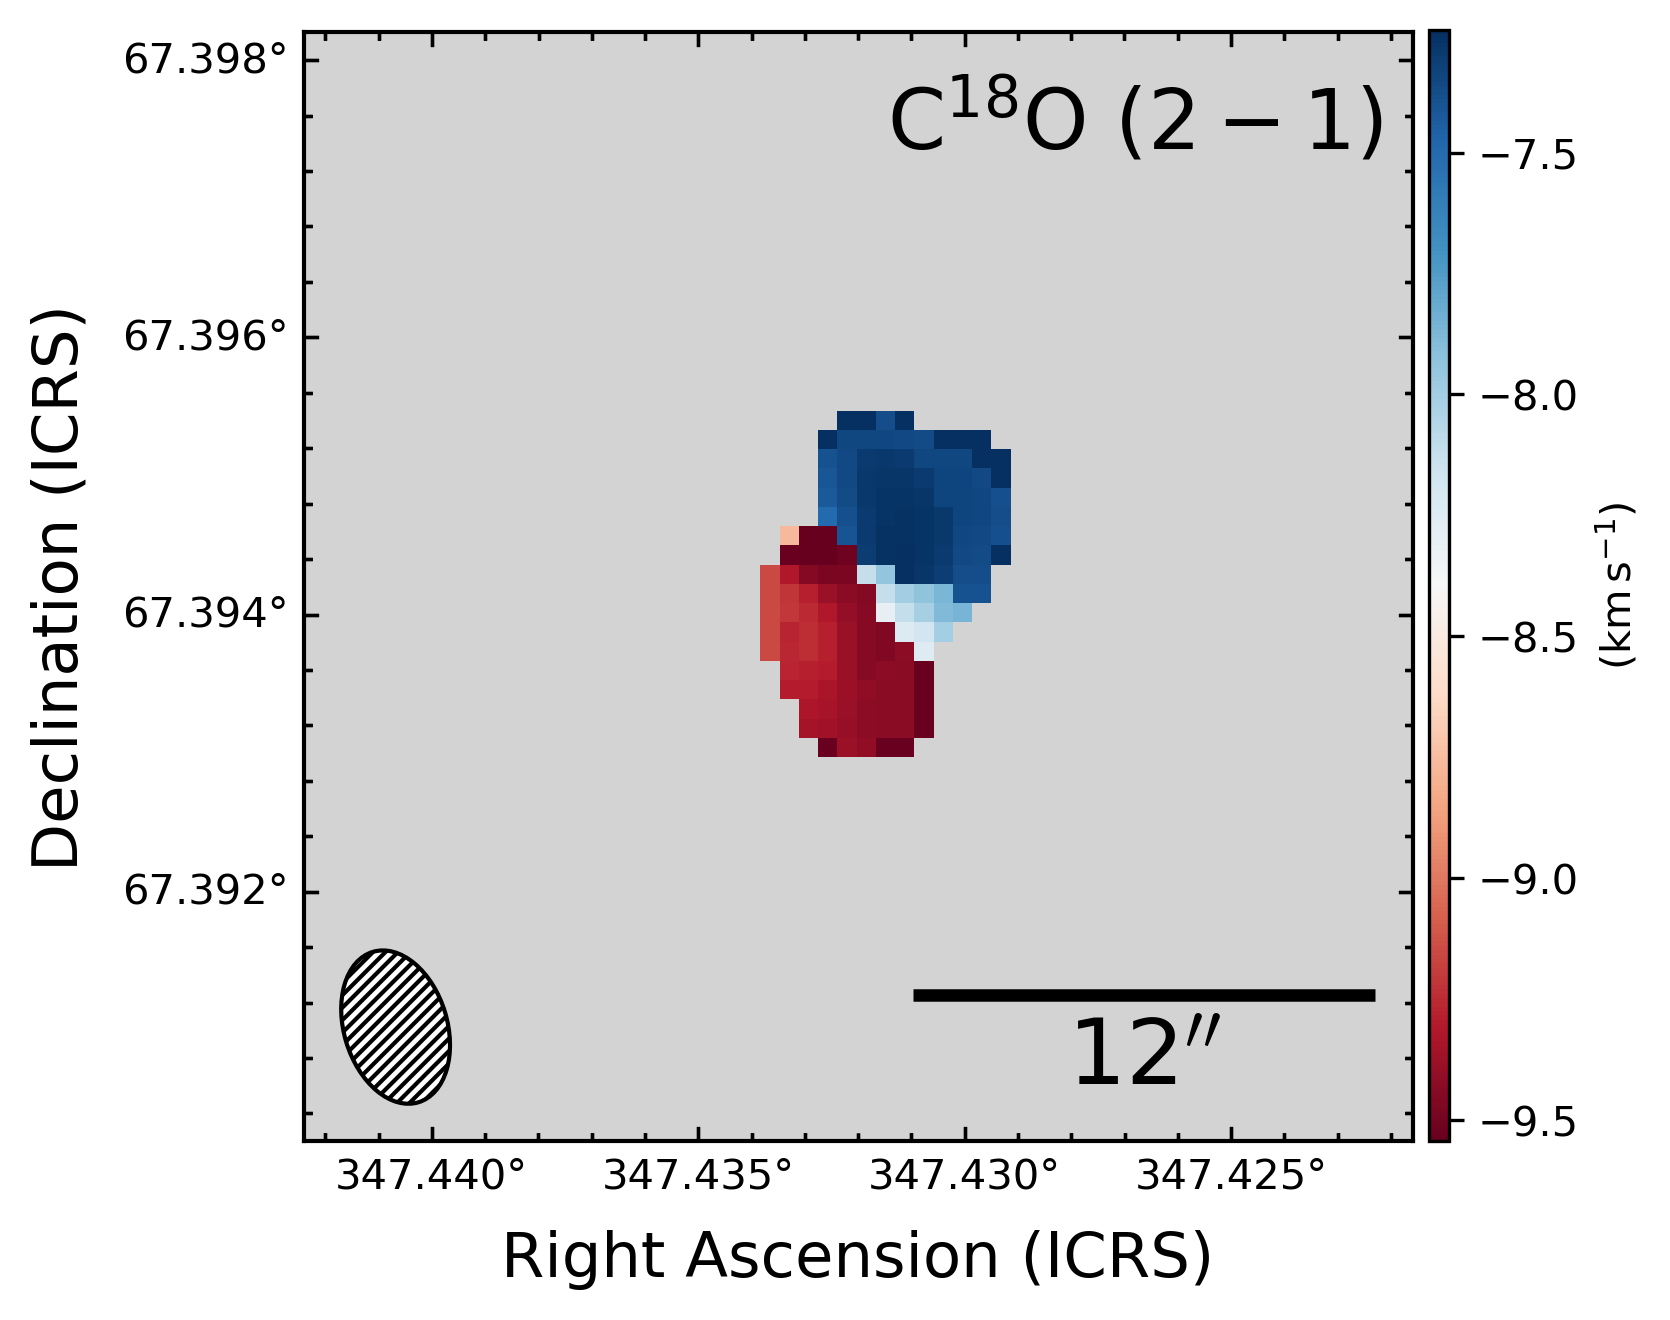

In [13]:
color_table='RdBu'
fig = plt.figure(dpi=300)

f_mom1_C18O = aplpy.FITSFigure(mom1_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom1_C18O[0].data, [2, 98])
f_mom1_C18O.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

# adopt the default layout
figure_layout( f_mom1_C18O, c_unit='(m s$^{-1}$)', fontcolor='black', colorbar=False)

# got the coordinates of the center from CASAviewer
f_mom1_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom1_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='black', size=20)


im = plt.imshow(mom1_C18O[0].data/1000., cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=10)

f_mom1_C18O.set_nan_color('lightgrey')


fig.savefig('../plots/moment1/mom1_C18O.pdf', bbox_inches='tight')


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


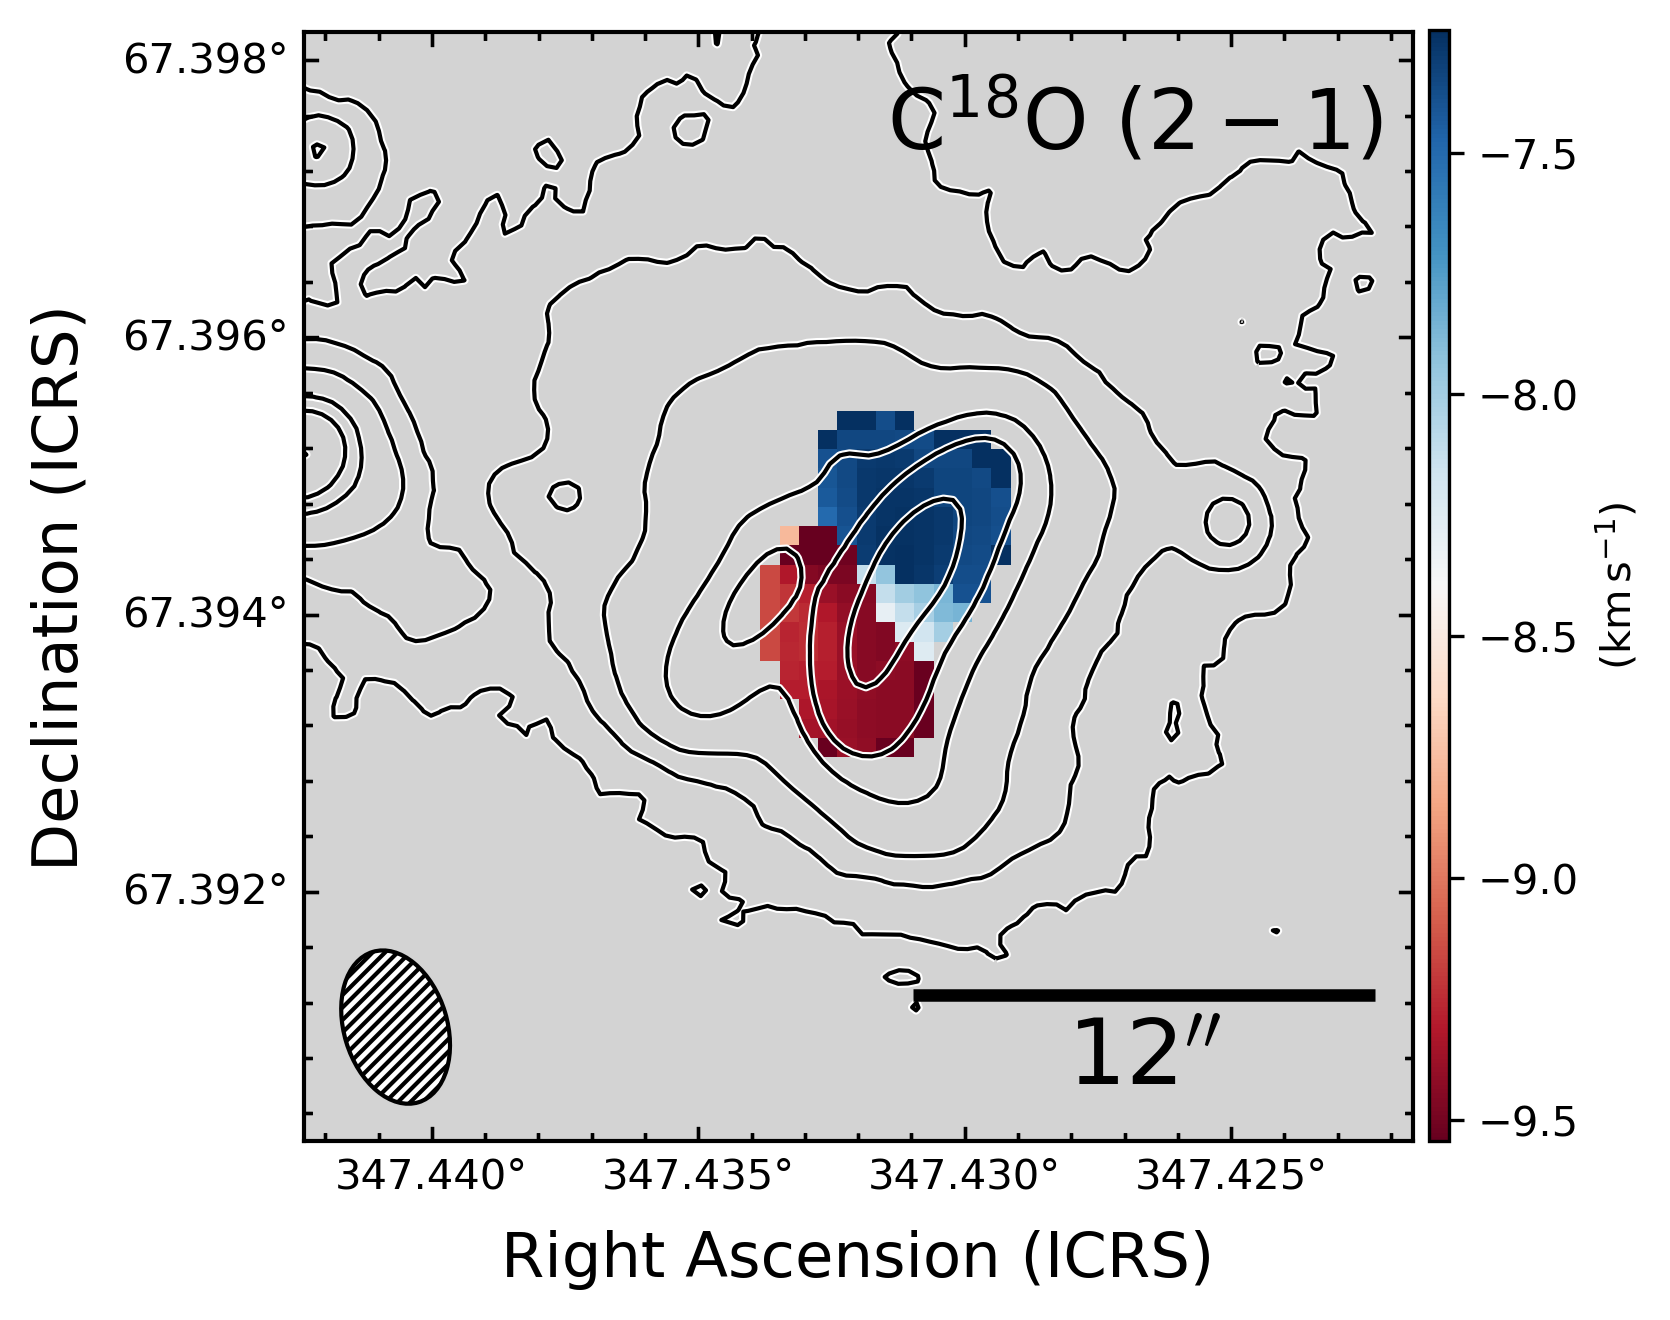

In [15]:
color_table='RdBu'
fig = plt.figure(dpi=300)

f_mom1_C18O = aplpy.FITSFigure(mom1_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom1_C18O[0].data, [2, 98])
f_mom1_C18O.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

# adopt the default layout
figure_layout( f_mom1_C18O, c_unit='(m s$^{-1}$)', fontcolor='black', colorbar=False)

rms_PS1 = 17.
c_levs = np.array([4, 16, 40, 160, 400, 1600])*rms_PS1
f_mom1_C18O.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='white', linewidths=2., levels=c_levs, smooth=3, kernel='box')
f_mom1_C18O.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='black', linewidths=1, levels=c_levs, smooth=3, kernel='box')


# got the coordinates of the center from CASAviewer
f_mom1_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom1_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='black', size=20)


im = plt.imshow(mom1_C18O[0].data/1000., cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=10)

f_mom1_C18O.set_nan_color('lightgrey')


fig.savefig('../plots/moment1/mom1_C18O_PS1contours.pdf', bbox_inches='tight')

In [18]:
mom1_C18O[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  144                                                  
NAXIS2  =                  144                                                  
BMAJ    = 0.001133798095915052                                                  
BMIN    = 0.000744579169485304                                                  
BPA     =            16.910122                                                  
BUNIT   = 'm/s     '                                                            
CTYPE1  = 'RA---SIN'                                                            
CRVAL1  =       347.4318541667                                                  
CDELT1  =  -0.0001388888888889                                                  
CRPIX1  =                 73

In [19]:
print(mom1_C18O[0].header['BMAJ']*3600)  
print(mom1_C18O[0].header['BMIN']*3600)                                                                                    

4.081673145294188
2.6804850101470947


## Plot channel map

### 1st: add keywords for beam to header

In [20]:
from astropy.utils.data import get_pkg_data_filename

cube_file = '/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.lsrk.im.image_modified_header.fits'

fits_file = get_pkg_data_filename(cube_file)
fits.info(fits_file)

# got these values from the mom0 file...don't know why the cube doesn't have them
fits.setval(fits_file, 'BMAJ', value=mom0_C18O[0].header['BMAJ'])
fits.setval(fits_file, 'BMIN', value=mom0_C18O[0].header['BMIN'])
fits.setval(fits_file, 'BPA', value=mom0_C18O[0].header['BPA'])

Filename: /Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.lsrk.im.image_modified_header.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     273   (144, 144, 60, 1)   float32   
  1  BEAMS         1 BinTableHDU     30   60R x 5C   [1E, 1E, 1E, 1J, 1J]   


### 2nd: Zoom into the central region of the data cube

In [21]:
from astropy.wcs import wcs

data_file = fits.open(cube_file)[0]
data, header = data_file.data, data_file.header

# got this coordinates from Casaviewer
x_center = 347.432
y_center = 67.3941
w = wcs.WCS(header, naxis=(1,2))

print(w)

#Convert center value to pixel coordinates
pixcrd = w.wcs_world2pix(np.vstack((x_center,y_center)).T, 1)[0]
print(pixcrd)

print(w.wcs_pix2world(np.vstack((72.59639019, 72.64000047)).T,1))

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 347.4318541667  67.39415  
CRPIX : 73.0  73.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  
NAXIS : 144  144  60  1
[72.59639019 72.64000047]
[[347.432   67.3941]]


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [22]:
mom0_C18O[0].header['RESTFRQ']/1e9*u.GHz

<Quantity 219.5603541 GHz>

In [23]:
from spectral_cube import SpectralCube

# C18O J = 2−1 rest frequency (219.56035 GHz) from data header
cube_contour = SpectralCube.read(cube_file, format='fits')
cube_contour = cube_contour.with_spectral_unit(unit=u.km/u.s, rest_value=mom0_C18O[0].header['RESTFRQ']/1e9*u.GHz, velocity_convention='radio')
cube_contour._unit = u.Jy/u.beam

cube_contour

VaryingResolutionSpectralCube with shape=(60, 144, 144) and unit=Jy / beam:
 n_x:    144  type_x: RA---SIN  unit_x: deg    range:   347.406190 deg:  347.457880 deg
 n_y:    144  type_y: DEC--SIN  unit_y: deg    range:    67.384148 deg:   67.404009 deg
 n_s:     60  type_s: VRAD      unit_s: km / s  range:      -22.500 km / s:       0.000 km / s

In [24]:
import pyspeckit

#xwidth and ywidth are radii in pixel units of the data cube
cutout_cube = pyspeckit.cubes.subcube(cube_contour, xcen=pixcrd[0], ycen=pixcrd[1], xwidth=25, ywidth=25)


In [25]:
cutout_cube.header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    3                                                  
NAXIS1  =                   51                                                  
NAXIS2  =                   51                                                  
NAXIS3  =                   60                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'DraChi  '                                                            
BUNIT   = 'Jy beam-1'          / Brightness (pixel) unit                        
ALTRVAL =  -0.000000000000E+

### 3rd: Plot channel map

In [26]:
import matplotlib.patheffects as pe

def channel_map_layout(fig, rms, slice, label='', fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False):
    fig.set_nan_color('0.95')
    
    # beam 
    fig.add_beam()
    fig.beam.set(facecolor='white', edgecolor='black', hatch='////////', lw=0.5)
        
    fig.axis_labels.set_font(size=6)
    fig.axis_labels.set_xtext('RA')
    fig.tick_labels.set_yformat('d.ddd')
    fig.axis_labels.set_ytext('DEC')
    fig.tick_labels.set_xformat('d.ddd')
    fig.axis_labels.set_ypad(pad=-1.5)
    
    fig.ticks.set_color(fontcolor)
    fig.ticks.set_tick_direction('in')
    fig.tick_labels.set_font(size=6)
    #fig.ticks.set_minor_frequency(2)
    fig.ticks.set_yspacing(0.002)  # degrees
    fig.ticks.set_xspacing(0.01)  # degrees
    
    fig.axis_labels.hide_x()
    fig.axis_labels.hide_y()
    
    if plot_xlabel==False:
        fig.tick_labels.hide_x()
        
    if plot_ylabel==False:
        fig.tick_labels.hide_y()
        
    if plot_cbar:
        fig.add_colorbar()
        fig.colorbar.set_location('right')
        fig.colorbar.set_width(0.05)
        fig.colorbar.set_pad(0.5)
        fig.colorbar.set_axis_label_text('(Jy beam$^{-1}$)')
        
    c_levs = np.array([3, 6, 12, 18])*rms
    fig.show_contour(cube_contour[slice].hdu, colors='white', linewidths=1, levels=c_levs)
    fig.show_contour(cube_contour[slice].hdu, colors='black', linewidths=0.75, levels=c_levs)
    
    fig.add_label(0.67, 0.9, label, relative=True, color=fontcolor, size=6, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])


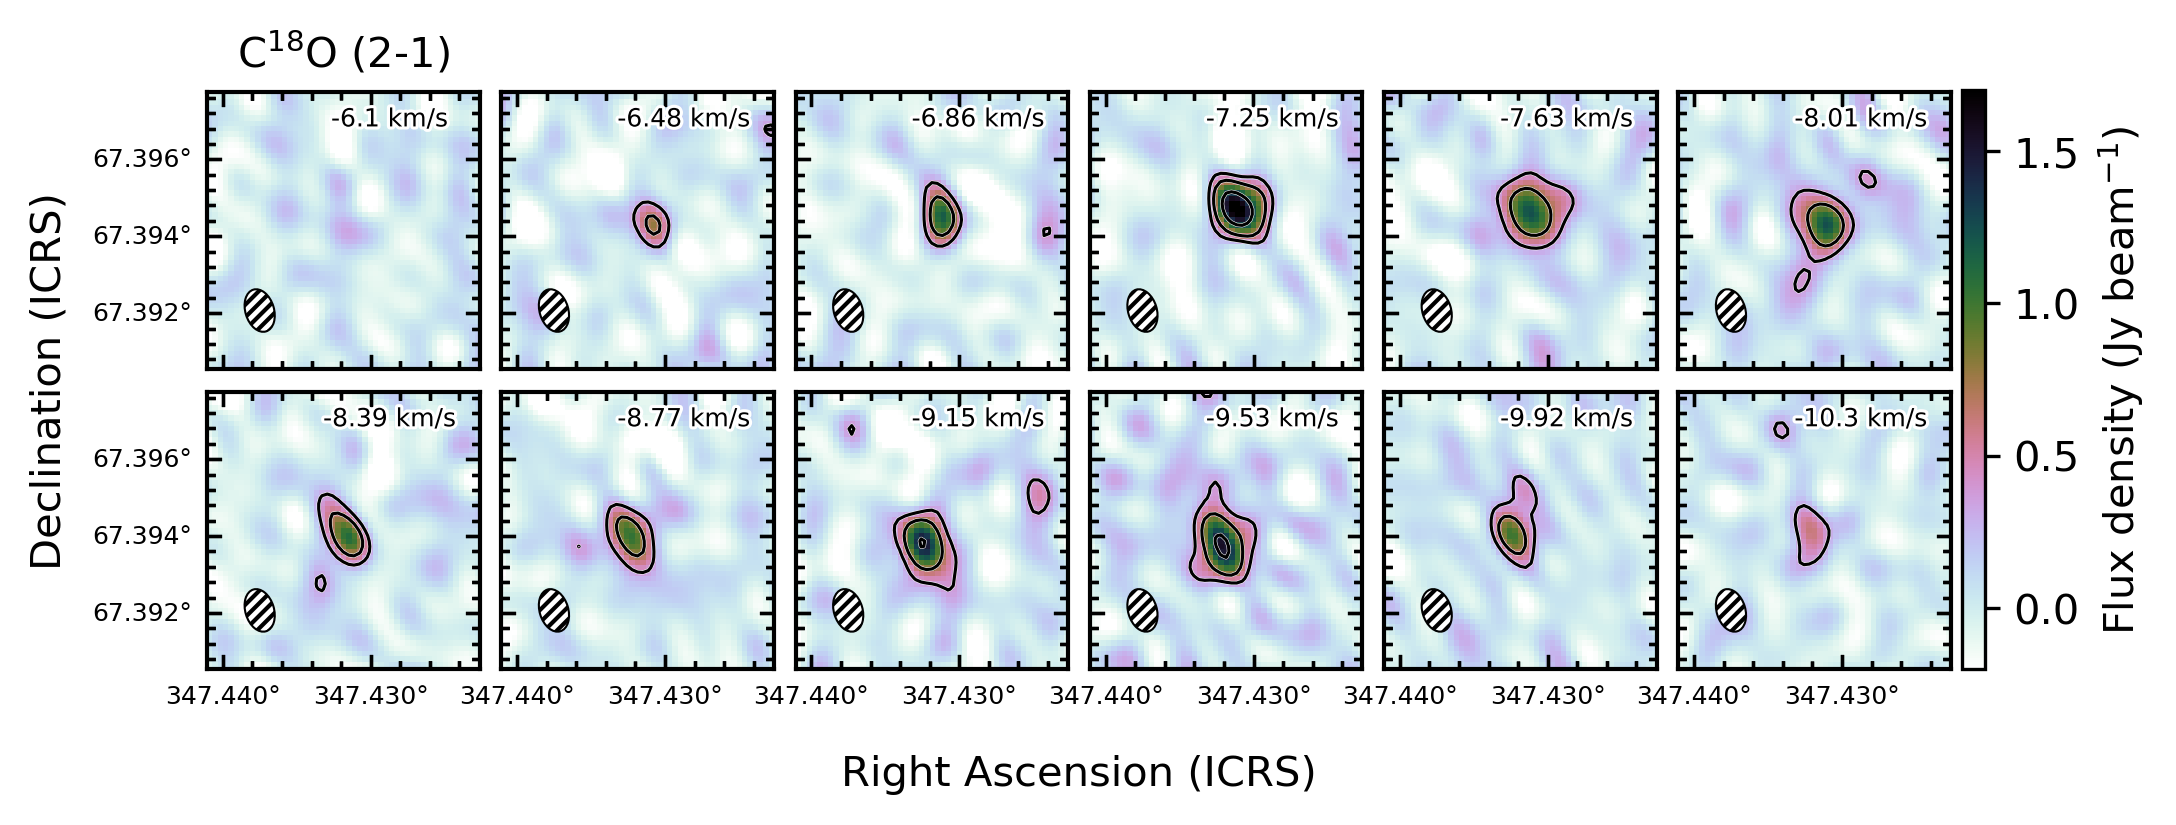

In [36]:
import matplotlib.gridspec as gridspec
import cmocean 

fig = plt.figure(dpi=300, figsize=(7.5,2.5))

color_table='cubehelix_r'
#color_table=cmocean.cm.ice_r


gridspec_layout = gridspec.GridSpec(2,6)
gridspec_layout.update(hspace=0.08, wspace=0.08)

rms = 1.16e-01 # Jy/beam m/s; mean RMS determined from bettermoments
v0 = -0.000136542 # velocity in the first channel (it is NOT the same as is stored in ['CRVAL3]!)

### FIRST ROW
channel=16
rms = 1.10e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_0 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[0].get_position(fig).bounds))
f_cube_C18O_0.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_0, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=False, plot_ylabel=True, plot_cbar=False)
f_cube_C18O_0.set_title('C$^{18}$O (2-1)', fontsize=10)

channel+=1
rms = 1.12e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_1 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[1].get_position(fig).bounds))
f_cube_C18O_1.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_1, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.28e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_2 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[2].get_position(fig).bounds))
f_cube_C18O_2.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_2, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.05e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_3 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[3].get_position(fig).bounds))
f_cube_C18O_3.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_3, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.26e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_4 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[4].get_position(fig).bounds))
f_cube_C18O_4.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_4, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.22e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_5 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[5].get_position(fig).bounds))
f_cube_C18O_5.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_5, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

### SECOND ROW
channel+=1
rms = 1.06e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_6 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[6].get_position(fig).bounds))
f_cube_C18O_6.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_6, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=True, plot_ylabel=True, plot_cbar=False)

channel+=1
rms = 1.23e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_7 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[7].get_position(fig).bounds))
f_cube_C18O_7.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_7, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.23e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_8 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[8].get_position(fig).bounds))
f_cube_C18O_8.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_8, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.17e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_9 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[9].get_position(fig).bounds))
f_cube_C18O_9.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_9, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.08e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_10 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[10].get_position(fig).bounds))
f_cube_C18O_10.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_10, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel+=1
rms = 1.08e-1
channel_vel_cen = cutout_cube.header['CRVAL3']-0.000136542+channel*cutout_cube.header['CDELT3']
f_cube_C18O_11 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[11].get_position(fig).bounds))
f_cube_C18O_11.show_colorscale(cmap=color_table, vmin=-0.2, vmax=1.7) 
channel_map_layout( f_cube_C18O_11, rms=rms, slice=channel, label='{0} km/s'.format(np.round(channel_vel_cen, 2)), fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

fig.subplots_adjust(wspace=0.05)
#fig.subplots_adjust(hspace=0.01)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.085, 0.05, 0.7])
#fig.colorbar(f_cube_C18O_17, cax=cbar_ax)

# add an axes, lower left corner in [0.83, 0.08] measured in figure coordinate with axes width 0.02 and height 0.8
im = plt.imshow(cutout_cube[channel].data, cmap=color_table, vmin=-0.2, vmax=1.7)
cb_ax = fig.add_axes([0.905, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('Flux density (Jy beam$^{-1}$)', fontsize=10)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Right Ascension (ICRS)")
plt.ylabel("Declination (ICRS)", labelpad=10)

fig.savefig('../plots/channel_maps/channel_C18O.pdf', bbox_inches='tight')


### Get the pixel scale

In [28]:
from astropy import wcs

ww2 = wcs.WCS(mom0_C18O[0].header)

#wcs.utils.non_celestial_pixel_scales(ww2)

wcs.utils.proj_plane_pixel_scales(ww2)

array([0.00013889, 0.00013889])

In [29]:
(0.00013889*u.deg).to(u.arcsec) # arcsec per pixel

<Quantity 0.500004 arcsec>

## maximum emission

In [30]:
!bettermoments /Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/not_clipped/DraChi.briggs0.C18O.velcor.lsrk.im.image.fits 

Loading up data...
Estimating noise in the data...
Estimated RMS: 1.16e-01.
Masking the data...
Calculating maps...
Checking for NaNs in error maps.
Saving moment maps...


In [31]:
max_C18O = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/not_clipped/DraChi.briggs0.C18O.velcor.lsrk.im.image_Fnu.fits')

INFO: Auto-setting vmin to -1.000e+03 [aplpy.core]


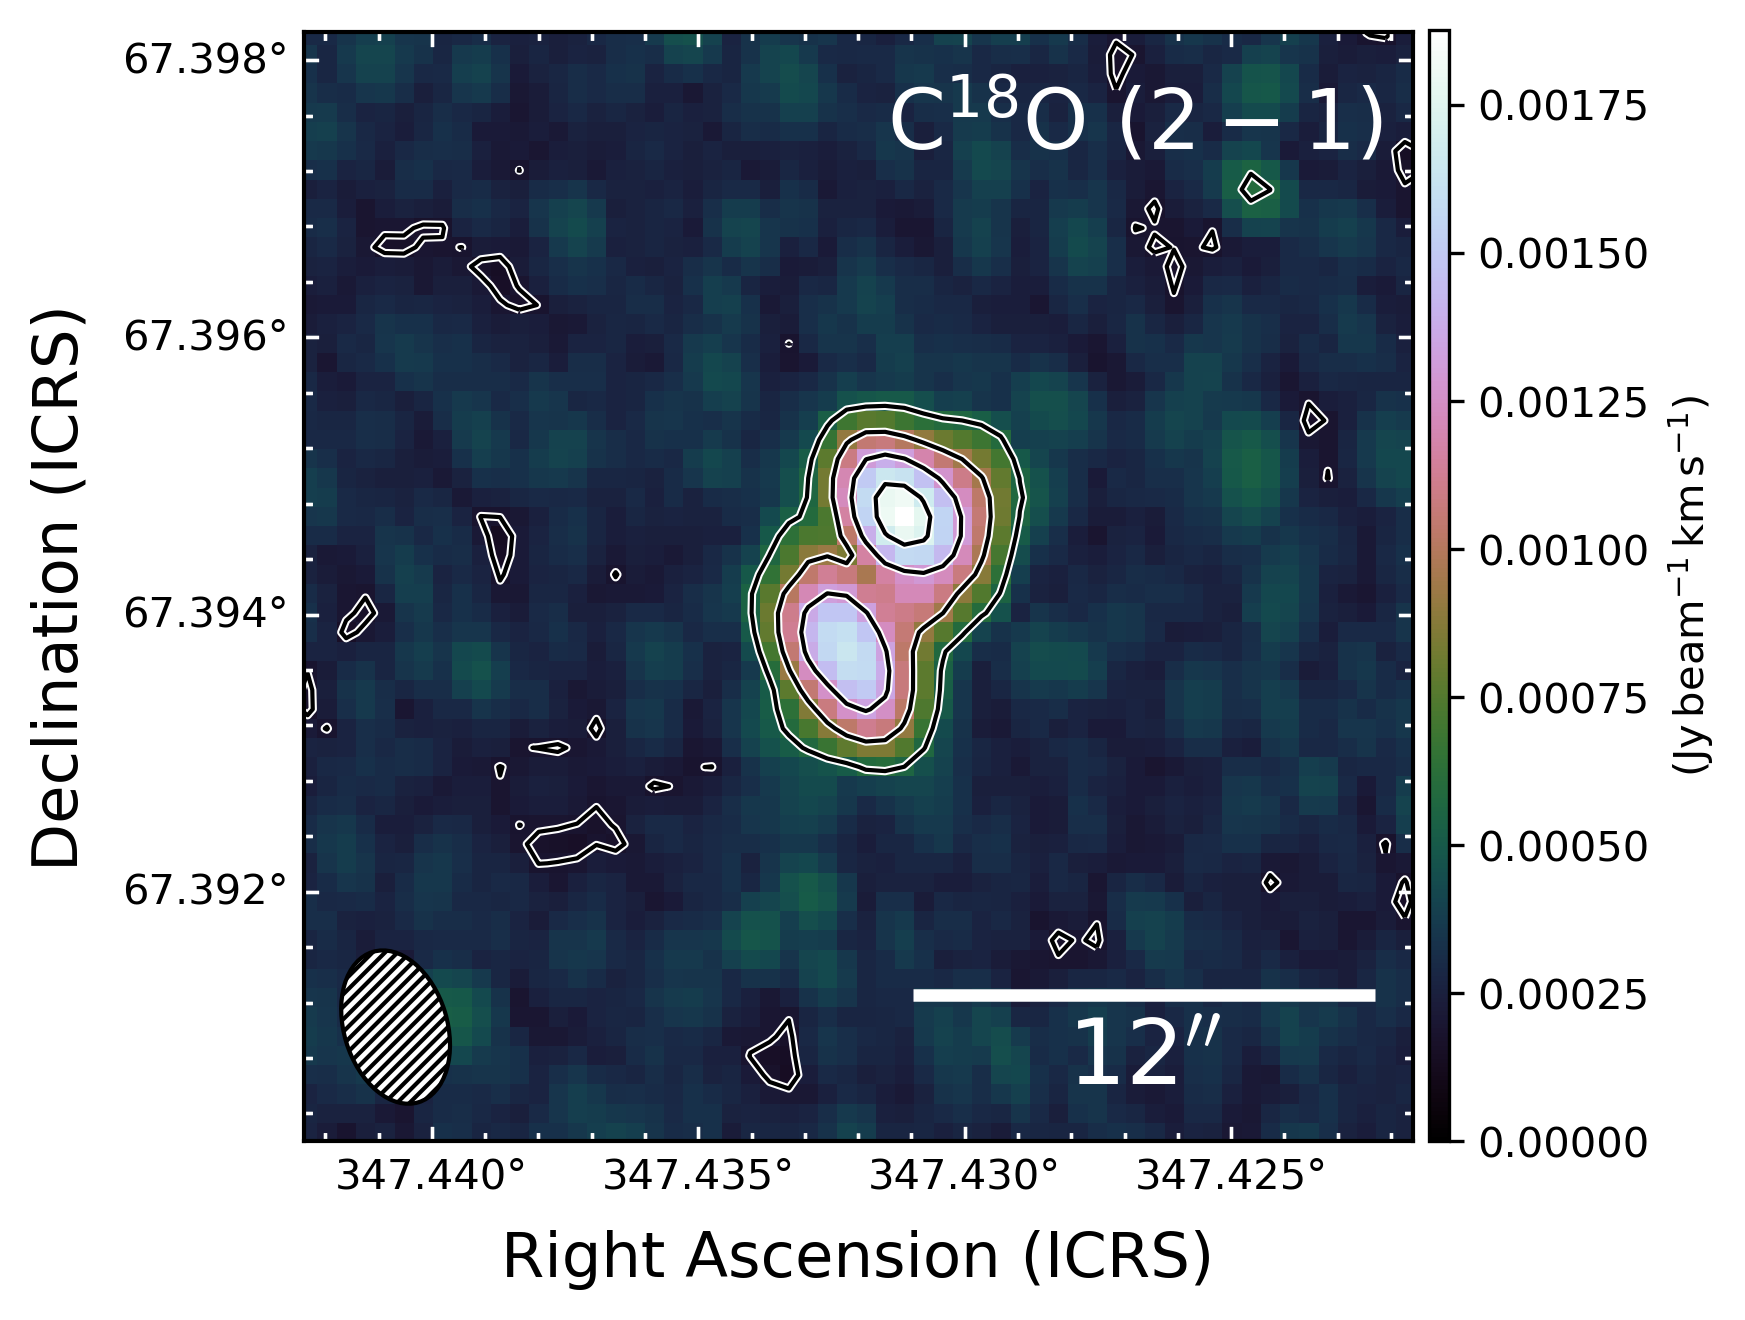

In [32]:
color_table='cubehelix'
fig = plt.figure(dpi=300)

f_max_C18O = aplpy.FITSFigure(max_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(max_C18O[0].data, [2, 98])
f_max_C18O.show_colorscale(cmap=color_table, vmax=10000) 

max_em = 1.88 # mJy/beam m/s from max map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_max_C18O, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False, fontcolor='white')

f_max_C18O.show_contour(colors='white', linewidths=2., levels=c_levs)
f_max_C18O.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_max_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_max_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(max_C18O[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

#fig.savefig('../plots/max_C18O_withcontours.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to -1.000e+03 [aplpy.core]


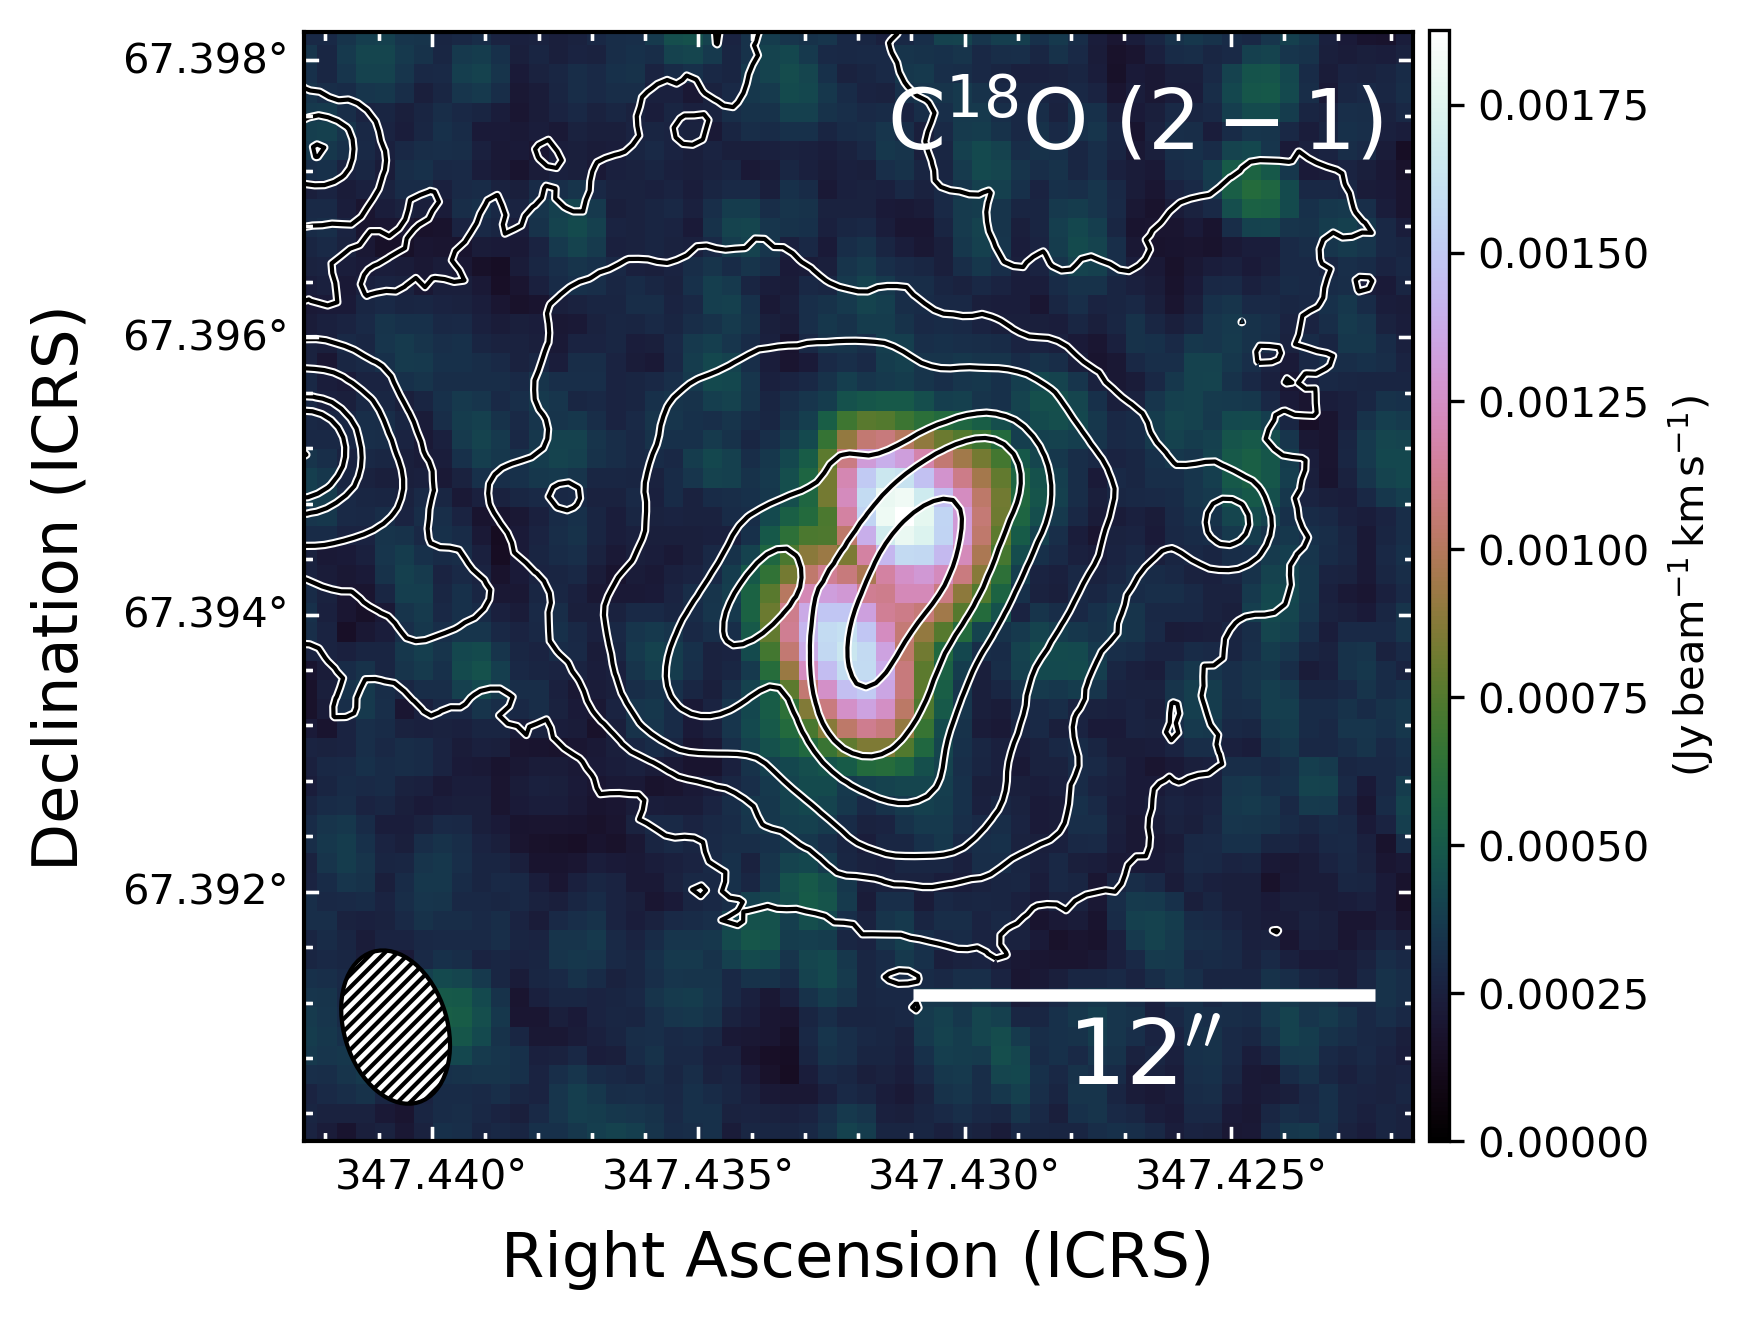

In [33]:
color_table='cubehelix'
fig = plt.figure(dpi=300)

f_max_C18O = aplpy.FITSFigure(max_C18O, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(max_C18O[0].data, [2, 98])
f_max_C18O.show_colorscale(cmap=color_table, vmax=10000) 


# adopt the default layout
figure_layout( f_max_C18O, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False, fontcolor='white')

rms = 17.
c_levs = np.array([4, 16, 40, 160, 400, 1600])*rms
f_max_C18O.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='white', linewidths=2., levels=c_levs, smooth=3, kernel='box')
f_max_C18O.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='black', linewidths=1., levels=c_levs, smooth=3, kernel='box')

# got the coordinates of the center from CASAviewer
f_max_C18O.recenter(347.432,67.3942,width=0.008,height=0.008)

f_max_C18O.add_label(0.75,0.92, 'C$^{18}$O $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(max_C18O[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

#fig.savefig('../plots/max_C18O_withcontours_2.pdf', bbox_inches='tight')

In [34]:
(mom1_C18O[0].header['BMAJ']*u.deg).to(u.arcsec)

<Quantity 4.08167315 arcsec>

In [35]:
(mom1_C18O[0].header['BMIN']*u.deg).to(u.arcsec)

<Quantity 2.68048501 arcsec>